# Jupyter Notebook for the new __[The Cosmopolitan Globalist](https://claireberlinski.substack.com/p/introducing-the-cosmopolitan-globalist)__


#### _For making article word cloud & CG Logo - for any article, using Text_
#### _Uses Matplotlib, NumPy and WordCloud libraries._
##### _21 December 2020_

In [76]:
#If 'wordcloud' not available, install 

list_installed_lib  = !pip list 
list_installed_lib = list_installed_lib.get_nlstr()

if list_installed_lib.find('wordcloud') ==-1:
    !pip install wordcloud

In [138]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

In [123]:
file = open('try.txt','r')

In [131]:
if '.' in file.name:
    place = file.name.rfind('.')
    folder_name = file.name[:-4]
else:
    folder_name = file.name

In [133]:
read_text = file.read()

In [134]:
file.close()

In [391]:
# Directory name in the same folder of the file
main_directory     = os.path.abspath(file.name)
main_directory_ind = os.path.abspath(file.name).rfind(file.name) 
main_directory     = os.path.abspath(file.name)[:main_directory_ind]
main_directory     = os.path.join(main_directory, file.name[:-4]+'_TheCGLogos')  
main_directory_PNG     = os.path.join(main_directory, 'PNG')  
main_directory_JPEG     = os.path.join(main_directory, 'JPEG') 

In [392]:
if not os.path.exists(main_directory):
    os.makedirs(main_directory)

if not os.path.exists(main_directory_PNG):
    os.makedirs(main_directory_PNG)
    
if not os.path.exists(main_directory_JPEG):
    os.makedirs(main_directory_JPEG)

In [213]:
read_text

'China, the 7th Fleet, and the future of US power\nThe Cosmopolitan Globalists welcome our first Letter to the Editors\n\t\nClaire Berlinski\n19 min ago\t\n4\n\t\n\nThe Cosmopolitan Globalists are thrilled to present the first Letter to the Editors we have ever received.\n\nAdam Garfinkle—member of the editorial board of American Purpose, founding editor of The American Interest, distinguished fellow at the S. Rajaratnam School of International Studies at Nanyang Technological University, and dear friend of the Cosmopolitan Globalists—wrote to us over the weekend to tell us we are wrong about the RCEP—or at least, only half-right.\n\nWe stopped the presses to publish it. Vivek has replied to Adam.\n\nBest of all, we have cajoled from Adam a promise to discuss this with us in a podcast, which we will record as soon as possible and post immediately. Do please send us any questions you’d like us to ask him.\n\nIt’s all so exciting we can hardly bear it.\n\nTo the Editors:\n\nVivek Y. Kelk

In [19]:
wordcloud = WordCloud().generate(read_text)

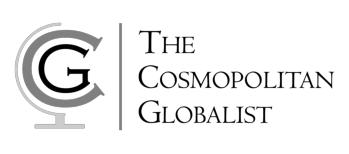

In [326]:
from PIL import Image 
mask = Image.open("CG.png")#.convert('L')
imgData = np.asarray(mask)
# imgData = imgData[35:-60,20:-30].copy()
plt.imshow((imgData), cmap='gray');
plt.axis('off');

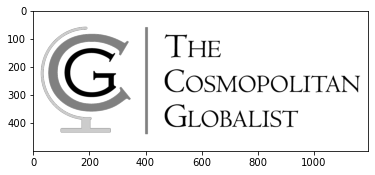

In [338]:
plt.imshow((imgData), cmap='gray');

In [79]:
# from skimage import io
# mask = io.imread("CG.png")
# mask.shape

In [81]:
# from skimage.color import rgb2gray
# img_gray = rgb2gray(mask)
# img_gray.shape
# plt.imshow(img_gray)
# mask_ = mask[:,:,0] + mask[:,:,1] + mask[:,:,2]
# mask_ = mask_ / mask_.max()
# plt.imshow( 255 - 10000*mask_, cmap = 'gray')
# mask_.max(), type(mask_)

In [362]:
imgData.shape

(500, 1195, 4)

In [398]:
def write_files(main_directory, file_name, stopwords, mask, show_image, 
                read_text, max_font_size=80, max_words=100, 
                background_color="white", colormap="viridis", alpha_1 = 1, alpha_2 = 1,
                third_image = None, alpha_3 = 0):
    
    wordcloud  = WordCloud(stopwords=STOPWORDS, max_font_size=max_font_size,
                                max_words=max_words, background_color = background_color, 
                                mask = mask, colormap=colormap).generate(read_text)
    
    fig, ax = plt.subplots()
    ax.imshow(wordcloud, interpolation="bilinear", alpha = alpha_1)
    # plt.imshow(255-mask, cmap='gray')
    fig.tight_layout()
    ax.imshow((show_image), cmap='gray', alpha = alpha_2)
    if alpha_3 > 0: #If third image is given
            ax.imshow((third_image), cmap='gray', alpha = alpha_3)
    
    ax.axis('off')
    ax.set_axis_off()
    
    dpi_list = [150, 200]
    file_format_list = ['png', 'jpeg']
    
    for dpi, file_format  in [(dpi,file) for dpi in dpi_list for file in file_format_list]:
        file_name_ = file_name + '_' + str(colormap) + '_dpi_' + str(dpi) + '.' + file_format
        if file_format == 'png':
            file_name_ = os.path.join(main_directory_PNG, file_name_)
        elif file_format == 'jpeg':
            file_name_ = os.path.join(main_directory_JPEG, file_name_)
            
        plt.savefig(file_name_, dpi=dpi,bbox_inches="tight", transparent=True)

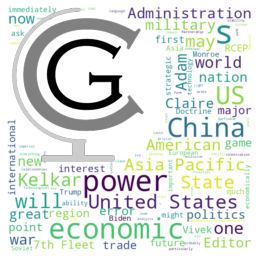

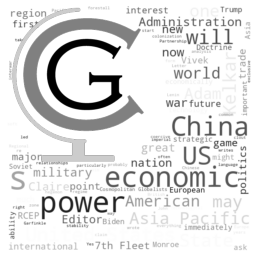

In [409]:
# Circle 
from  copy import copy
# N = 600
C = 185
nx, ny = (600, 600)
x = np.arange(0, nx)
y = np.arange(0, ny)
xv, yv = np.meshgrid(y, x)

imgData_ = np.ones((nx,ny,4), dtype=np.uint8 )*255

indisler = ((xv - 200)**2 + (yv-200)**2)>=C**2
imgData_[ indisler ] = 0

# for i in range(nx):
#     for j in range(ny):
#         if ((xv[i, j] - 200)**2 + (yv[i, j]-200)**2)<C**2:
#             imgData_[i, j] = 0

# imgData_[:, :350] = 0
imgData__ = imgData_.copy()
# imgData__[:, 350:] = 255
imgData_[:445, :385] = (imgData[55:500, 15:400])
# plt.imshow((imgData__), cmap='gray')


 

wordcloud = WordCloud(stopwords=STOPWORDS, max_font_size=80, max_words=100, background_color="white", mask = imgData__, colormap="viridis").generate(read_text)
# plt.figure(figsize=(15,15))
# plt.imshow( 255 - 10000*mask_, cmap = 'gray', alpha = 0.1)
# plt.imshow(wordcloud, interpolation="bilinear", alpha = 1.0)
# # plt.imshow(255-mask, cmap='gray')
# plt.imshow((imgData_), cmap='gray', alpha = 1)
# plt.axis("off")
# plt.savefig(file_directory, dpi=150)
write_files(main_directory, 'circular_top_left', STOPWORDS, imgData__, imgData_, read_text, max_font_size=80, 
            max_words=100, background_color="white", colormap="viridis", alpha_1 = 1, alpha_2 = 1)
write_files(main_directory, 'circular_top_left', STOPWORDS, imgData__, imgData_, read_text, max_font_size=80, 
            max_words=100, background_color="white", colormap="gray", alpha_1 = 1, alpha_2 = 1)


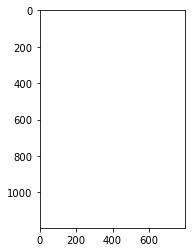

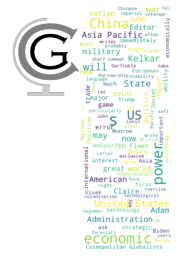

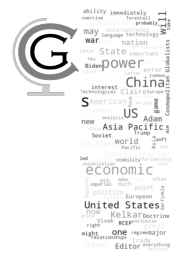

In [407]:
# UZUNLAMASINA
from  copy import copy
imgData_ = np.zeros((1195,800,4),dtype=np.uint8)
imgData_[:, :350] = 0
imgData__ = copy(imgData_)
imgData__[:, 350:] = 255
plt.imshow((imgData_), cmap='gray', alpha = 1.0)
imgData_[:500, :400] = imgData[:500, :400]

# mask_ = mask < 220

wordcloud = WordCloud(stopwords=STOPWORDS, max_font_size=80, max_words=100, background_color="white", mask = ~imgData__, colormap="viridis").generate(read_text)
# plt.figure(figsize=(15,15))
# plt.imshow( 255 - 10000*mask_, cmap = 'gray', alpha = 0.1)
# plt.imshow(wordcloud, interpolation="bilinear", alpha = 1.0)
# plt.imshow(255-mask, cmap='gray')
# plt.imshow((imgData_), cmap='gray', alpha = 1)
# plt.axis("off")
# plt.savefig('covid.png', dpi=150)
# plt.show()

write_files(main_directory, 'longitudinal',  STOPWORDS, ~imgData__, imgData_, read_text, max_font_size=80, 
            max_words=100, background_color="white", colormap="viridis", alpha_1 = 1, alpha_2 = 1)
write_files(main_directory, 'longitudinal',  STOPWORDS, ~imgData__, imgData_, read_text, max_font_size=80, 
            max_words=100, background_color="white", colormap="gray", alpha_1 = 1, alpha_2 = 1)

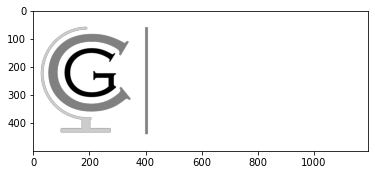

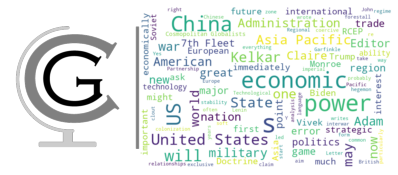

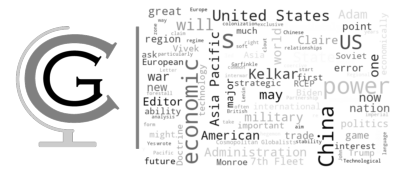

In [406]:
from  copy import copy
imgData_ = copy(imgData)
imgData_[:, 415:] = 0
imgData__ = copy(imgData_)
imgData__[:, :415] = 255
plt.imshow((imgData_), cmap='gray', alpha = 1.0)

# mask_ = mask < 220

# wordcloud = WordCloud(stopwords=STOPWORDS, max_font_size=80, max_words=100, background_color="white", mask = imgData__, colormap="viridis").generate(read_text)
# plt.figure(figsize=(15,15))
# plt.imshow( 255 - 10000*mask_, cmap = 'gray', alpha = 0.1)
# plt.imshow(wordcloud, interpolation="bilinear", alpha = 1.0)
# # plt.imshow(255-mask, cmap='gray')
# plt.imshow((imgData_), cmap='gray', alpha = 1)
# plt.axis("off")
# plt.savefig('covid.png', dpi=150)
# plt.show()
write_files(main_directory, 'CG_leftalone',  STOPWORDS, imgData__, imgData_, read_text, max_font_size=80, 
            max_words=100, background_color="white", colormap="viridis", alpha_1 = 1, alpha_2 = 1)
write_files(main_directory, 'CG_leftalone',  STOPWORDS, imgData__, imgData_, read_text, max_font_size=80, 
            max_words=100, background_color="white", colormap="gray", alpha_1 = 1, alpha_2 = 1)

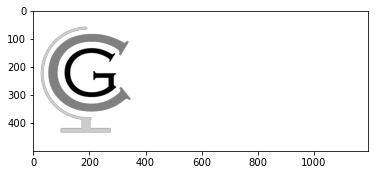

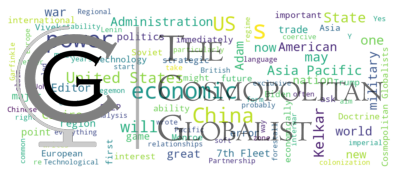

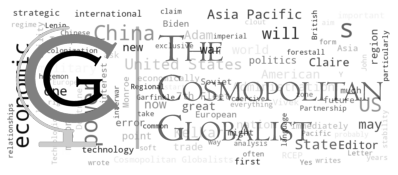

In [405]:
from  copy import copy
zeros_image = np.zeros_like(imgData)
imgData_ = copy(imgData)
imgData_[:, 385:] = 0
imgData__ = copy(imgData_)
imgData__[:, :385] = 255

imgData__after = zeros_image = copy(imgData)
imgData__after[:, :400] = 0



plt.imshow((imgData_), cmap='gray', alpha = 1.0)

# mask_ = mask < 220

# wordcloud = WordCloud(stopwords=STOPWORDS, max_font_size=80, max_words=100, background_color="white", mask = zeros_image, colormap="viridis").generate(read_text)
# # plt.figure(figsize=(15,15))
# # plt.imshow( 255 - 10000*mask_, cmap = 'gray', alpha = 0.1)
# plt.imshow(wordcloud, interpolation="bilinear", alpha = 1.0)
# # plt.imshow(255-mask, cmap='gray')
# plt.imshow((imgData_), cmap='gray', alpha = 1)
# plt.imshow((imgData__after), cmap='gray', alpha = 0.6)
# plt.axis("off")
# plt.savefig('covid.png', dpi=150)
# plt.show()


write_files(main_directory, 'CG_watermark_type_2', STOPWORDS, zeros_image, imgData_, read_text, max_font_size=80, 
            max_words=100, background_color="white", colormap="viridis", alpha_1 = 1, alpha_2 = 1, third_image = imgData__after, alpha_3 = 0.6)
write_files(main_directory, 'CG_watermark_type_2', STOPWORDS, zeros_image, imgData_, read_text, max_font_size=80, 
            max_words=100, background_color="white", colormap="gray", alpha_1 = 1, alpha_2 = 1, third_image = imgData__after, alpha_3 = 0.6)

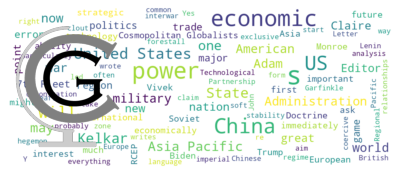

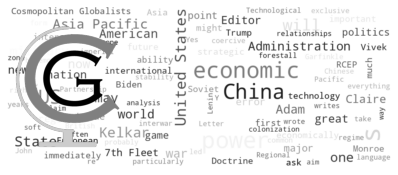

In [404]:
from  copy import copy
zeros_image = np.zeros_like(imgData)
imgData_ = copy(imgData)
imgData_[:, 385:] = 0
imgData__ = copy(imgData_)
imgData__[:, :385] = 255

# wordcloud = WordCloud(stopwords=STOPWORDS, max_font_size=80, max_words=100, background_color="white", mask = zeros_image, colormap="viridis").generate(read_text)

# plt.figure(figsize=(15,15))
# plt.imshow( 255 - 10000*mask_, cmap = 'gray', alpha = 0.1)
# plt.imshow(wordcloud, interpolation="bilinear", alpha = 1.0)
# # plt.imshow(255-mask, cmap='gray')
# plt.imshow((imgData_), cmap='gray', alpha = 1)
# # plt.imshow((imgData__after), cmap='gray', alpha = 0.4)
# plt.axis("off")
# plt.savefig('covid.jpg', dpi=150)
# plt.show()

write_files(main_directory, 'CG_only', STOPWORDS, zeros_image, imgData_, read_text, max_font_size=80, 
            max_words=100, background_color="white", colormap="viridis", alpha_1 = 1, alpha_2 = 1)
write_files(main_directory, 'CG_only', STOPWORDS, zeros_image, imgData_, read_text, max_font_size=80, 
            max_words=100, background_color="white", colormap="gray", alpha_1 = 1, alpha_2 = 1)

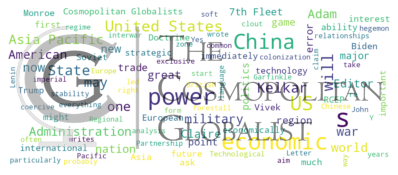

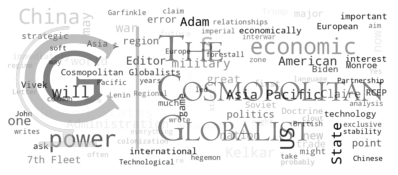

In [403]:

zeros_image = np.zeros_like(imgData)

# wordcloud = WordCloud(stopwords=STOPWORDS, max_font_size=80, max_words=100, background_color="white", mask = zeros_image, colormap="viridis").generate(read_text)
# plt.figure(figsize=(15,15))
# plt.imshow( 255 - 10000*mask_, cmap = 'gray', alpha = 0.1)
# plt.imshow(wordcloud, interpolation="bilinear", alpha = 1.0)
# # plt.imshow(255-mask, cmap='gray')
# plt.imshow((imgData), cmap='gray', alpha = .5)
# plt.axis("off")
# plt.savefig('covid.png', dpi=200)
# plt.show()

write_files(main_directory, 'CG_watermark_type_1',  STOPWORDS, zeros_image, imgData, read_text, max_font_size=80, 
            max_words=100, background_color="white", colormap="viridis", alpha_1 = 1, alpha_2 =.5)
write_files(main_directory, 'CG_watermark_type_1',  STOPWORDS, zeros_image, imgData, read_text, max_font_size=80, 
            max_words=100, background_color="white", colormap="gray", alpha_1 = 1, alpha_2 = .5)

In [112]:
# wordcloud.to_file("first_review2.png")